#**Data Preparation and Cleaning**

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

In [286]:
df = pd.read_csv('/content/data_hotel_booking_demand.csv')
display(df.head(), df.tail())

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
83572,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1


In [287]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (83573, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [288]:
display(df.describe(), df.describe(include='object'))

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


In [289]:
df.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

In [290]:
df = df.dropna()
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [291]:
df['country'].value_counts()

PRT    34097
GBR     8495
FRA     7307
ESP     5996
DEU     5116
       ...  
ZMB        1
LCA        1
SYC        1
GLP        1
AIA        1
Name: country, Length: 162, dtype: int64

In [292]:
cancelation = df['is_canceled'].value_counts()
cancelation

0    52490
1    30732
Name: is_canceled, dtype: int64

In [293]:
total_guest_percountry = df[df['is_canceled']== 0]['country'].value_counts().reset_index()
total_guest_percountry.columns = ['country', 'number of guests']
total_guest_percountry

,country,number of guests
0,PRT,14940
1,GBR,6771
2,FRA,5941
3,ESP,4450
4,DEU,4272
...,...,...
143,LCA,1
144,MNE,1
145,RWA,1
146,AND,1


In [294]:
total_guest_pertype = df['customer_type'].value_counts()
total_guest_pertype

Transient          62414
Transient-Party    17507
Contract            2882
Group                419
Name: customer_type, dtype: int64

##Data Visualization

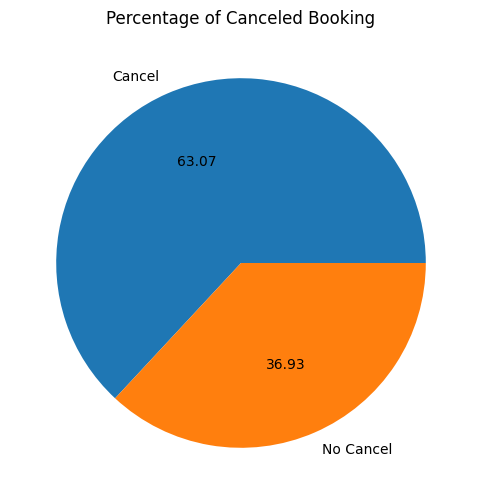

In [295]:
plt.figure(figsize=(8,6))
plt.pie(x = cancelation,
        labels = ['Cancel', 'No Cancel'],
        autopct = '%.2f'
        )
plt.title('Percentage of Canceled Booking')
plt.show()

In [296]:
market_segment = df['market_segment'].value_counts()
market_segment

Online TA        39408
Offline TA/TO    16980
Groups           13718
Direct            8776
Corporate         3668
Complementary      506
Aviation           165
Undefined            1
Name: market_segment, dtype: int64

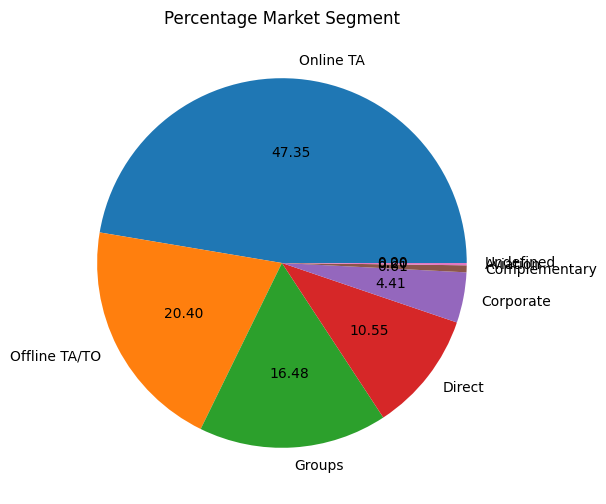

In [297]:
plt.figure(figsize=(8,6))
plt.pie(x = market_segment,
        labels = ['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate', 'Complementary', 'Aviation', 'Undefined'],
        autopct = '%.2f')
plt.title('Percentage Market Segment')
plt.show()

##Model Building

In [298]:
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [299]:
df.drop(['country'], axis = 1, inplace = True)

In [300]:
df

,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...
83568,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [301]:
category_column = [col for col in df.columns
                 if df[col].dtype == 'O']
category_column

['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']

In [302]:
category_df = df[category_column]
category_df.head(10)

,market_segment,deposit_type,customer_type,reserved_room_type
0,Offline TA/TO,No Deposit,Transient-Party,A
1,Online TA,No Deposit,Transient,A
2,Online TA,No Deposit,Transient,A
3,Online TA,No Deposit,Transient,A
4,Online TA,No Deposit,Transient,A
5,Direct,No Deposit,Transient-Party,A
6,Groups,Non Refund,Transient,A
7,Groups,Non Refund,Transient,A
8,Online TA,No Deposit,Transient,E
9,Groups,Non Refund,Contract,A


In [303]:
numeric_df = df.drop(columns = category_column, axis = 1)
numeric_df.drop('is_canceled', axis = 1)
numeric_df

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
0,0,0,0,0,0,0
1,0,0,0,0,2,0
2,0,1,0,0,2,0
3,0,0,0,0,1,1
4,0,2,0,0,2,0
...,...,...,...,...,...,...
83568,0,0,0,0,3,1
83569,0,0,0,0,2,0
83570,0,1,0,0,3,0
83571,0,0,0,0,0,0


In [304]:
X = pd.concat([category_df, numeric_df], axis = 1)
y = df['is_canceled']

In [305]:
# printing unique values of each column
for col in category_df.columns:
    print(f"{col}: \n{category_df[col].unique()}\n")

market_segment: 
['Offline TA/TO' 'Online TA' 'Direct' 'Groups' 'Corporate' 'Complementary'
 'Aviation' 'Undefined']

deposit_type: 
['No Deposit' 'Non Refund' 'Refundable']

customer_type: 
['Transient-Party' 'Transient' 'Contract' 'Group']

reserved_room_type: 
['A' 'E' 'D' 'F' 'B' 'G' 'C' 'H' 'L' 'P']



In [306]:
# encoding categorical variables
category_df['market_segment'] = category_df['market_segment'].map({'Offline TA/TO' : 0, 'Online TA' : 1, 'Direct' : 2, 'Groups' : 3, 'Corporate' : 4, 'Complementary' : 5, 'Aviation' :6, 'Undefined' :7})
category_df['deposit_type'] = category_df['deposit_type'].map({'No Deposit' : 0, 'Non Refund' :1, 'Refundable' :2})
category_df['customer_type'] = category_df['customer_type'].map({'Transient-Party' : 0, 'Transient' : 1, 'Contract' :2, 'Group' :3})
category_df['reserved_room_type'] = category_df['reserved_room_type'].map({'A' : 0, 'E':1,'D':2, 'F':3, 'B':4, 'G':5, 'C':6, 'H':7, 'L':8, 'P':9})


<ipython-input-306-6a5f734a26a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['market_segment'] = category_df['market_segment'].map({'Offline TA/TO' : 0, 'Online TA' : 1, 'Direct' : 2, 'Groups' : 3, 'Corporate' : 4, 'Complementary' : 5, 'Aviation' :6, 'Undefined' :7})
<ipython-input-306-6a5f734a26a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['deposit_type'] = category_df['deposit_type'].map({'No Deposit' : 0, 'Non Refund' :1, 'Refundable' :2})
<ipython-input-306-6a5f734a26

In [307]:
category_df.head(10)

,market_segment,deposit_type,customer_type,reserved_room_type
0,0,0,0,0
1,1,0,1,0
2,1,0,1,0
3,1,0,1,0
4,1,0,1,0
5,2,0,0,0
6,3,1,1,0
7,3,1,1,0
8,1,0,1,1
9,3,1,2,0


##Model in Is Canceled

## KNN

In [308]:
X = pd.concat([category_df, numeric_df], axis = 1)
y = df['is_canceled']

In [309]:
X.shape, y.shape

((83222, 10), (83222,))

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [311]:
category_df

,market_segment,deposit_type,customer_type,reserved_room_type
0,0,0,0,0
1,1,0,1,0
2,1,0,1,0
3,1,0,1,0
4,1,0,1,0
...,...,...,...,...
83568,1,0,2,0
83569,1,0,1,2
83570,1,0,1,2
83571,0,0,0,0


In [312]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_log_reg)
conf = confusion_matrix(y_test, y_pred_log_reg)
clf_report = classification_report(y_test, y_pred_log_reg)

print(f"Accuracy Score dari Logistic Regression adalah : {accuracy_logistic}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score dari Logistic Regression adalah : 1.0
Confusion Matrix : 
[[15606     0]
 [    0  9361]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15606
           1       1.00      1.00      1.00      9361

    accuracy                           1.00     24967
   macro avg       1.00      1.00      1.00     24967
weighted avg       1.00      1.00      1.00     24967



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [313]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
confusion = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score dari KNN adalah : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score dari KNN adalah : 0.9974366163335603
Confusion Matrix : 
[[15606     0]
 [    0  9361]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15606
           1       1.00      0.99      1.00      9361

    accuracy                           1.00     24967
   macro avg       1.00      1.00      1.00     24967
weighted avg       1.00      1.00      1.00     24967



In [314]:
# from sklearn.model_selection import train_test_split
# y = df['is_canceled']
# X = df.drop('is_canceled', axis = 1)
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,test_size=0.3)

##Decision Tree

In [315]:
X = pd.concat([category_df, numeric_df], axis = 1)
y = df['is_canceled']

In [316]:
X.shape, y.shape

((83222, 10), (83222,))

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [318]:
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)

y_pred_decision = decision.predict(X_test)

acc_decision = accuracy_score(y_test, y_pred_decision)
conf = confusion_matrix(y_test, y_pred_decision)
clsf_report = classification_report(y_test, y_pred_decision)

print(f"Accuracy Score dari Decision Tree adalah : {acc_decision}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score dari Decision Tree adalah : 1.0
Confusion Matrix : 
[[15801     0]
 [    0  9166]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15606
           1       1.00      0.99      1.00      9361

    accuracy                           1.00     24967
   macro avg       1.00      1.00      1.00     24967
weighted avg       1.00      1.00      1.00     24967



## Random Forest

In [319]:
X = pd.concat([category_df, numeric_df], axis = 1)
y = df['is_canceled']

In [320]:
X.shape, y.shape

((83222, 10), (83222,))

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [322]:
random_clsf = RandomForestClassifier()
random_clsf.fit(X_train, y_train)

y_pred_random_clsf = random_clsf.predict(X_test)

acc_random_clsf = accuracy_score(y_test, y_pred_random_clsf)
confusion = confusion_matrix(y_test, y_pred_random_clsf)
clsf_report = classification_report(y_test, y_pred_random_clsf)

print(f"Accuracy Score dari Random Forest adalah : {acc_random_clsf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score dari Random Forest adalah : 1.0
Confusion Matrix : 
[[15801     0]
 [    0  9166]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15606
           1       1.00      0.99      1.00      9361

    accuracy                           1.00     24967
   macro avg       1.00      1.00      1.00     24967
weighted avg       1.00      1.00      1.00     24967



##Ada Boost Clasifier

In [323]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(base_estimator = dtc)
adc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [324]:

y_pred_adc = adc.predict(X_test)

acc_adc = accuracy_score(y_test, y_pred_adc)
conf = confusion_matrix(y_test, y_pred_adc)
clf_report = classification_report(y_test, y_pred_adc)

print(f"Accuracy Score dari Ada Boost Classifier adalah : {acc_adc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score dari Ada Boost Classifier adalah : 1.0
Confusion Matrix : 
[[15768     0]
 [    0  9199]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15768
           1       1.00      1.00      1.00      9199

    accuracy                           1.00     24967
   macro avg       1.00      1.00      1.00     24967
weighted avg       1.00      1.00      1.00     24967



##Gradient Boosting Classifier

In [325]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)

acc_gbc = accuracy_score(y_test, y_pred_gbc)
conf = confusion_matrix(y_test, y_pred_gbc)
clf_report = classification_report(y_test, y_pred_gbc)

print(f"Accuracy Score dari Ada Boost Classifier adalah : {acc_gbc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score dari Ada Boost Classifier adalah : 1.0
Confusion Matrix : 
[[15768     0]
 [    0  9199]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15768
           1       1.00      1.00      1.00      9199

    accuracy                           1.00     24967
   macro avg       1.00      1.00      1.00     24967
weighted avg       1.00      1.00      1.00     24967



#Extra Trees Classifier

In [326]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred_etc = etc.predict(X_test)

accuracy_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clsf_report = classification_report(y_test, y_pred_etc)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_etc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clsf_report}")

Accuracy Score of Ada Boost Classifier is : 1.0
Confusion Matrix : 
[[15768     0]
 [    0  9199]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15768
           1       1.00      1.00      1.00      9199

    accuracy                           1.00     24967
   macro avg       1.00      1.00      1.00     24967
weighted avg       1.00      1.00      1.00     24967



#KNN

In [327]:
X1 = pd.concat([category_df, numeric_df], axis = 1)
y1 = df['previous_cancellations']

In [328]:
X1.shape, y1.shape

((83222, 10), (83222,))

In [329]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.30)

In [330]:
knn = KNeighborsClassifier()
knn.fit(X1_train, y1_train)

y1_pred_knn = knn.predict(X1_test)

accuracy_knn1 = accuracy_score(y1_test, y1_pred_knn)
confusion1 = confusion_matrix(y1_test, y1_pred_knn)
clf_report1 = classification_report(y1_test, y1_pred_knn)

print(f"Accuracy Score dari KNN adalah : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score dari KNN adalah : 0.9974366163335603
Confusion Matrix : 
[[15768     0]
 [    0  9199]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15768
           1       1.00      1.00      1.00      9199

    accuracy                           1.00     24967
   macro avg       1.00      1.00      1.00     24967
weighted avg       1.00      1.00      1.00     24967



In [331]:
decision = DecisionTreeClassifier()
decision.fit(X1_train, y1_train)

y1_pred_decision = decision.predict(X1_test)

acc_decision1 = accuracy_score(y_test, y_pred_decision)
conf1 = confusion_matrix(y1_test, y1_pred_decision)
clsf_report1 = classification_report(y1_test, y1_pred_decision)

print(f"Accuracy Score dari Decision Tree adalah : {acc_decision}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score dari Decision Tree adalah : 1.0
Confusion Matrix : 
[[15768     0]
 [    0  9199]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15768
           1       1.00      1.00      1.00      9199

    accuracy                           1.00     24967
   macro avg       1.00      1.00      1.00     24967
weighted avg       1.00      1.00      1.00     24967

